# $\zeta$-Space of Lorentz synchronization
------------------------------------------------
This notebook is an example of the $\zeta$-space application over a synchronization Lorentz system. The implementation is presented [here](https://github.com/rsautter/Zeta-Space). The lorentz system is given by:

$$
{dx \over dt} = \sigma(y-x)
$$
$$
{dy \over dt} = x(\rho-z) -y
$$
$$
{dz \over dt} = xy -\beta z
$$

In [ ]:
!pip install MFDFA==0.4.1
!pip install git+https://github.com/rsautter/Zeta-Space/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rsautter/Zeta-Space/ to /tmp/pip-req-build-usqullqi
  Running command git clone -q https://github.com/rsautter/Zeta-Space/ /tmp/pip-req-build-usqullqi
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for zetaSpace: filename=zetaSpace-0.1-py3-none-any.whl size=5915 sha256=de4a6f9555df1b21550a084949c6ce97680b48a1cf4d3a8f8295dc972284551c
  Stored in directory: /tmp/pip-ephem-wheel-cache-joxhhh5l/wheels/db/bc/42/483e13446677140b7bb424768a5a65bef571a830bc8bc11145
Successfully built zetaSpace


In [ ]:
import zeta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Getting Data

In [ ]:
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/examples/LorentzSynch/Series_1.dat

--2022-08-02 17:40:07--  https://raw.githubusercontent.com/rsautter/Zeta-Space/main/examples/LorentzSynch/Series_1.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1379940 (1.3M) [text/plain]
Saving to: ‘Series_1.dat’

Series_1.dat        100%[===================>]   1.32M  --.-KB/s    in 0.06s   

2022-08-02 17:40:07 (23.9 MB/s) - ‘Series_1.dat’ saved [1379940/1379940]



In [ ]:
data = pd.read_csv("Series_1.dat",sep='\t',header=None)
data = data.rename(columns={0: "Time", 1: "Signal"})

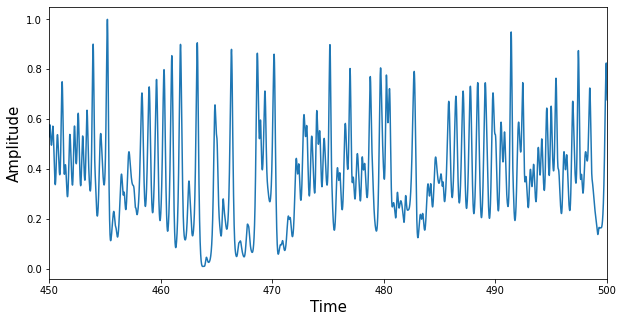

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data["Time"],data["Signal"])
plt.xlim(np.min(data["Time"]),np.max(data["Time"]))
plt.xlabel("Time",fontsize=15)
plt.ylabel("Amplitude",fontsize=15)
plt.show()

# 2. Finding the singularity spectrum and PSD

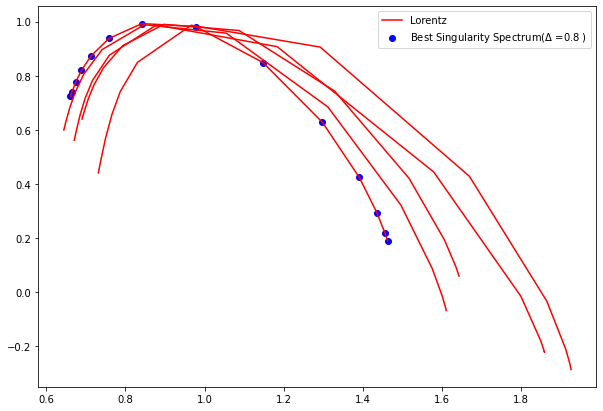

In [ ]:
bas, bfas, alphas, falphas, _  = zeta.autoMDFDA(data["Signal"].values)
delta = np.round(zeta.singularitySpectrumMetrics(bas,bfas)["delta_alpha"],2)

plt.figure(figsize=(10,7))
for i in range(len(alphas)):
  if i==0:
    plt.plot(alphas[i],falphas[i],color='r',label=r"Lorentz")
  else:
    plt.plot(alphas[i],falphas[i],color='r')
plt.scatter(bas,bfas,color='b',label="Best Singularity Spectrum($\Delta \alpha $ ="+str(delta)+" )")
plt.legend()
plt.show()

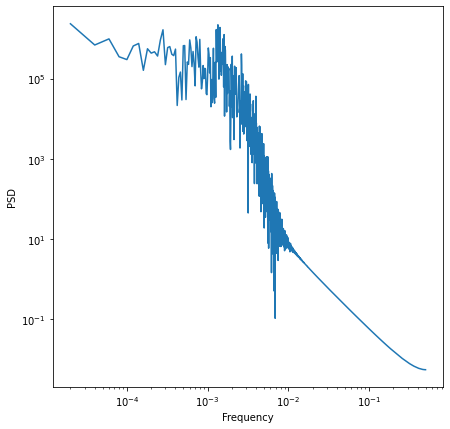

In [ ]:
psd = np.fft.fft(data["Signal"].values)
psd = np.real(psd*np.conj(psd))
freq = np.fft.fftfreq(len(psd))
seq = np.argsort(freq)

freq = freq[seq]
psd = psd[seq]

psd = psd[freq>0]
freq = freq[freq>0]


plt.figure(figsize=(7,7))
plt.loglog(freq,psd)
plt.xlabel("Frequency")
plt.ylabel("PSD")
plt.show()

# 3. Zeta Values

In [ ]:
zeta.zetaSpace(data["Signal"].values)

{'delta_alpha': 0.8791361391845318, 'spectral_entropy': 0.1389763122623641}

# 4. Comparing series

In [ ]:
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/examples/LorentzSynch/Series_100.dat
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/examples/LorentzSynch/Series_22.dat
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/examples/LorentzSynch/Series_3.dat

--2022-08-02 18:20:55--  https://raw.githubusercontent.com/rsautter/Zeta-Space/main/examples/LorentzSynch/Series_100.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1376713 (1.3M) [text/plain]
Saving to: ‘Series_100.dat’

Series_100.dat      100%[===================>]   1.31M  --.-KB/s    in 0.06s   

2022-08-02 18:20:55 (23.8 MB/s) - ‘Series_100.dat’ saved [1376713/1376713]

--2022-08-02 18:20:55--  https://raw.githubusercontent.com/rsautter/Zeta-Space/main/examples/LorentzSynch/Series_22.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 

In [ ]:
s1 = pd.read_csv("Series_1.dat",sep='\t',header=None)
s3 = pd.read_csv("Series_3.dat",sep='\t',header=None)
s22 = pd.read_csv("Series_22.dat",sep='\t',header=None)
s100 = pd.read_csv("Series_100.dat",sep='\t',header=None)

s1 = s1.rename(columns={0: "Time", 1: "Signal"})
s3 = s3.rename(columns={0: "Time", 1: "Signal"})
s22 = s22.rename(columns={0: "Time", 1: "Signal"})
s100 = s100.rename(columns={0: "Time", 1: "Signal"})

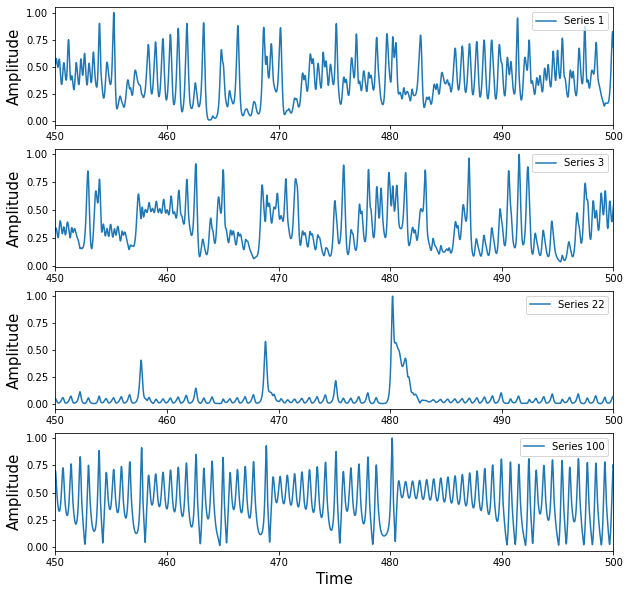

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(4,1,1)
plt.plot(s1["Time"],s1["Signal"],label="Series 1")
plt.xlim(np.min(s1["Time"]),np.max(s1["Time"]))
plt.ylabel("Amplitude",fontsize=15)
plt.legend()
plt.subplot(4,1,2)
plt.plot(s3["Time"],s3["Signal"],label="Series 3")
plt.xlim(np.min(s3["Time"]),np.max(s3["Time"]))
plt.ylabel("Amplitude",fontsize=15)
plt.legend()
plt.subplot(4,1,3)
plt.plot(s22["Time"],s22["Signal"],label="Series 22")
plt.xlim(np.min(s22["Time"]),np.max(s22["Time"]))
plt.ylabel("Amplitude",fontsize=15)
plt.legend()
plt.subplot(4,1,4)
plt.plot(s100["Time"],s100["Signal"],label="Series 100")
plt.xlim(np.min(s100["Time"]),np.max(s100["Time"]))
plt.legend()

plt.xlabel("Time",fontsize=15)
plt.ylabel("Amplitude",fontsize=15)
plt.show()

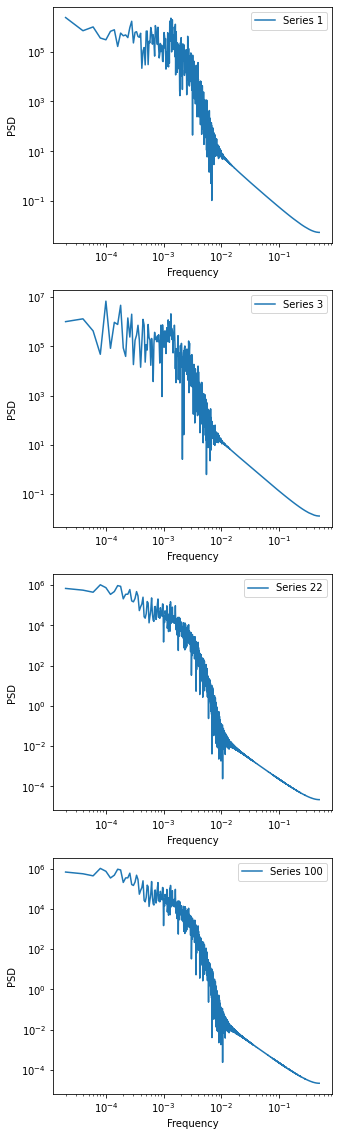

In [ ]:
def getPSD(serie):
  psd = np.fft.fft(serie)
  psd = np.real(psd*np.conj(psd))
  freq = np.fft.fftfreq(len(psd))
  seq = np.argsort(freq)

  freq = freq[seq]
  psd = psd[seq]

  psd = psd[freq>0]
  freq = freq[freq>0]
  return freq,psd


plt.figure(figsize=(5,20))
plt.subplot(4,1,1)
freq,psd = getPSD(s1["Signal"].values)
plt.loglog(freq,psd,label="Series 1")
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("PSD")

plt.subplot(4,1,2)
freq,psd = getPSD(s3["Signal"].values)
plt.loglog(freq,psd,label="Series 3")
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("PSD")

plt.subplot(4,1,3)
freq,psd = getPSD(s22["Signal"].values)
plt.loglog(freq,psd,label="Series 22")
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("PSD")

plt.subplot(4,1,4)
freq,psd = getPSD(s22["Signal"].values)
plt.loglog(freq,psd,label="Series 100")
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("PSD")

plt.show()

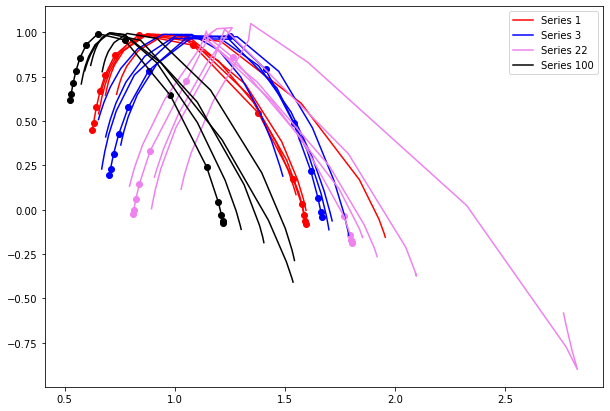

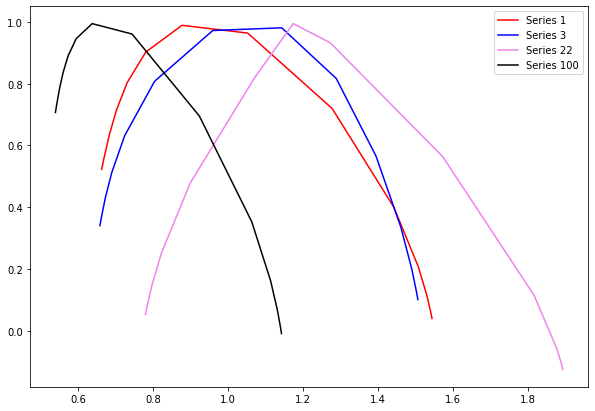

In [ ]:
bas, bfas, alphas, falphas, _  = zeta.autoMDFDA(s1["Signal"].values)

plt.figure(figsize=(10,7))

bas, bfas, alphas, falphas, _  = zeta.autoMDFDA(s1["Signal"].values)
for i in range(len(alphas)):
  if i==0:
    plt.plot(alphas[i],falphas[i],color='r',label=r"Series 1")
  else:
    plt.plot(alphas[i],falphas[i],color='r')
plt.scatter(bas,bfas,color='r')

bas, bfas, alphas, falphas, _  = zeta.autoMDFDA(s3["Signal"].values)
for i in range(len(alphas)):
  if i==0:
    plt.plot(alphas[i],falphas[i],color='b',label=r"Series 3")
  else:
    plt.plot(alphas[i],falphas[i],color='b')
plt.scatter(bas,bfas,color='b')

bas, bfas, alphas, falphas, _  = zeta.autoMDFDA(s22["Signal"].values)
for i in range(len(alphas)):
  if i==0:
    plt.plot(alphas[i],falphas[i],color='violet',label=r"Series 22")
  else:
    plt.plot(alphas[i],falphas[i],color='violet')
plt.scatter(bas,bfas,color='violet')


bas, bfas, alphas, falphas, _  = zeta.autoMDFDA(s100["Signal"].values)
for i in range(len(alphas)):
  if i==0:
    plt.plot(alphas[i],falphas[i],color='k',label=r"Series 100")
  else:
    plt.plot(alphas[i],falphas[i],color='k')
plt.scatter(bas,bfas,color='k')

plt.legend()


plt.figure(figsize=(10,7))

bas, bfas, alphas, falphas, _  = zeta.autoMDFDA(s1["Signal"].values)
plt.plot(bas,bfas,color='r',label=r"Series 1")

bas, bfas, alphas, falphas, _  = zeta.autoMDFDA(s3["Signal"].values)
plt.plot(bas,bfas,color='b', label=r"Series 3")

bas, bfas, alphas, falphas, _  = zeta.autoMDFDA(s22["Signal"].values)
plt.plot(bas,bfas,color='violet', label=r"Series 22")

bas, bfas, alphas, falphas, _  = zeta.autoMDFDA(s100["Signal"].values)
plt.plot(bas,bfas,color='k', label=r"Series 100")

plt.legend()

plt.show()

In [ ]:
s1Z = zeta.zetaSpace(s1["Signal"].values)
s3Z = zeta.zetaSpace(s3["Signal"].values)
s22Z = zeta.zetaSpace(s22["Signal"].values)
s100Z = zeta.zetaSpace(s100["Signal"].values)

In [ ]:
s1Z

{'delta_alpha': 0.9414542447668387, 'spectral_entropy': 0.1389763122623641}

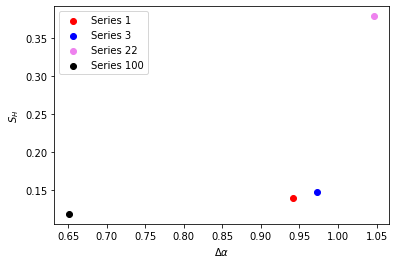

In [ ]:
plt.figure()
plt.scatter(s1Z["delta_alpha"],s1Z["spectral_entropy"],color='r',label=r"Series 1")
plt.scatter(s3Z["delta_alpha"],s3Z["spectral_entropy"],color='b',label=r"Series 3")
plt.scatter(s22Z["delta_alpha"],s22Z["spectral_entropy"],color='violet',label=r"Series 22")
plt.scatter(s100Z["delta_alpha"],s100Z["spectral_entropy"],color='k',label=r"Series 100")
plt.legend()
plt.xlabel(r"$\Delta \alpha $")
plt.ylabel(r"$S_H$")
plt.show()